In [61]:
import numpy as np
from jupyterthemes import jtplot
import matplotlib.pyplot as plt
%matplotlib inline
jtplot.style()

In [8]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
from torchvision import datasets, transforms

In [9]:
# cuda flag
use_gpu = torch.cuda.is_available()

In [10]:
from vae import VariationalAutoencoder

batch_size = 32

transform = transforms.Compose([transforms.ToTensor()])

mnist = datasets.MNIST('./', download=True, transform=transform)
dataloader = torch.utils.data.DataLoader(mnist, batch_size=batch_size, shuffle=True, num_workers=2)

model = VariationalAutoencoder([28*28, 32, 256])

if use_gpu: model = model.cuda()

optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [23]:
try:
    for epoch in range(100):
        for input, _ in dataloader:
            input = input.view(batch_size, -1)
            input = Variable(input)

            optimizer.zero_grad()

            reconstruction, (mu, log_var) = model(input)

            loss = F.binary_cross_entropy(reconstruction, input, size_average=False)
            kl_divergence = 0.5 * torch.sum(mu**2 + torch.exp(log_var) - log_var - 1.)

            total_loss = loss + kl_divergence

            total_loss.backward()
            optimizer.step()

        print("Epoch {0:}, loss: {1:.2f}, KL: {2:.2f}".format(epoch,
                                                              loss.data[0],
                                                              kl_divergence.data[0]))

except KeyboardInterrupt:
    pass


Epoch 0, loss: 2491.34, KL: 780.21


Epoch 1, loss: 2465.55, KL: 810.22


Epoch 2, loss: 2461.71, KL: 831.01


Epoch 3, loss: 2690.04, KL: 788.59


Epoch 4, loss: 2654.52, KL: 832.98


Process Process-25:


Process Process-26:


Traceback (most recent call last):


Traceback (most recent call last):


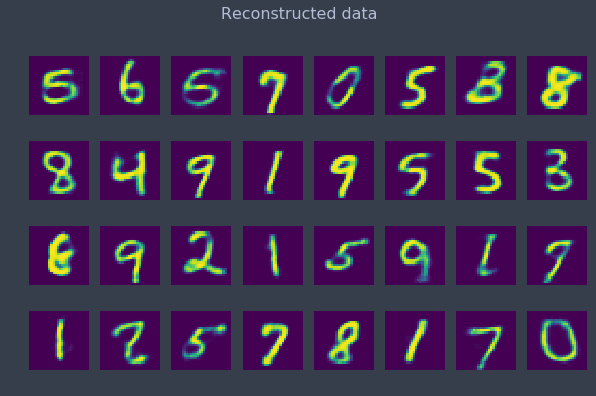

In [74]:
f, axarr = plt.subplots(4, 8, figsize=(10, 6))

input, _ = next(iter(dataloader))
input = Variable(input.view(batch_size, -1))
reconstruction, _ = model(input)

plt.suptitle("Reconstructed data")

for i in range(batch_size):
    images = reconstruction.data.numpy().reshape(-1, 28, 28)
    axarr[i//8, i%8].imshow(images[i])
    axarr[i//8, i%8].axis("off")

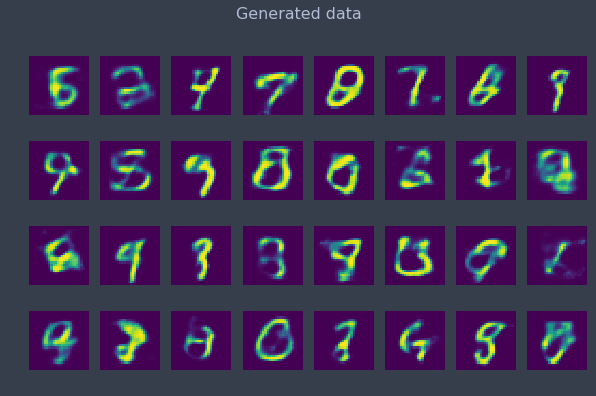

In [76]:
f, axarr = plt.subplots(4, 8, figsize=(10, 6))

z = torch.randn(batch_size, 32)
input = Variable(z)
generated = model.generate(input)

plt.suptitle("Generated data")

for i in range(batch_size):
    images = generated.data.numpy().reshape(-1, 28, 28)
    axarr[i//8, i%8].imshow(images[i])
    axarr[i//8, i%8].axis("off")